In [6]:
from final_model_log_scale import WAE, AudioDataset
import torch
import numpy as np
import matplotlib.pyplot as plt
import librosa as li
from IPython.display import Audio
from util import audio_utilities as au

In [7]:
def get_oct_semi(f0):
    f = 27.5*2**(np.arange(84)/12)
    idx = np.argmin(abs(f-f0))
    octave = torch.zeros([7])
    semi   = torch.zeros([12])
    octave[idx//12] = 1
    semi[idx%12] = 1
    return octave.unsqueeze(0) ,semi.unsqueeze(0)

In [10]:
torch.nn.Module.dump_patches = True

model,log = torch.load("../pretrained/model_WVAE_500_e.pt", map_location="cpu")
model.eval()

motu = AudioDataset("/home/antoine/Musique/enregistrement_cordes/export/motu_dataset/*.wav", slice_size=128, process=0)

print("Done!")

Done!


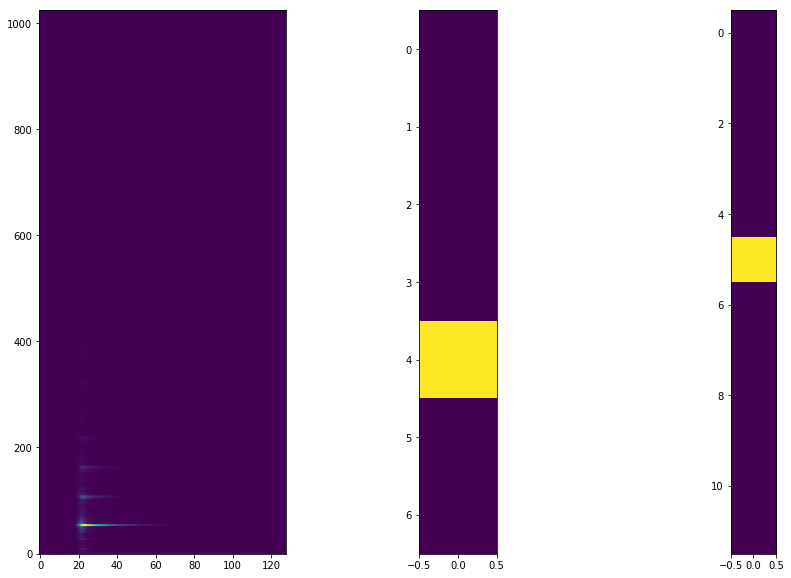

In [24]:
idx = 70

model.forward = model.sample

z = model.encode(motu[idx][0].unsqueeze(0))

o,s = motu[idx][1].unsqueeze(0) , motu[idx][2].unsqueeze(0)

s = torch.zeros([1, 12])
s[:, 5] = 1

S = model(z[2], o, s).detach().cpu().numpy()

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(S, origin="lower", aspect="auto")
plt.subplot(132)
plt.imshow(o.detach().cpu().numpy().T)
plt.subplot(133)
plt.imshow(s.detach().cpu().numpy().T)

In [25]:
Audio(au.reconstruct_signal_griffin_lim(S.T, 2048, 256, 100), rate=22050)

In [27]:
traced_model = torch.jit.trace(model, [z[2], o, s])
traced_model.save("model_WVAE_500.torchscript")